# EDAの作成

## 前準備

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# ライブラリのインポート
import os, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

warnings.filterwarnings("ignore")

# 日本語フォントを簡単に使う
!pip -q install japanize-matplotlib
import japanize_matplotlib

In [3]:
########################################################
# 必要に応じてデータを格納したパスに変更してください。 #

data_path = '/content/drive/MyDrive/SIGNATE/SMBC Group GREEN×DATA Challenge 2025 for Recruiting/data/'
train_df  = pd.read_csv(data_path + 'train.csv', index_col=0)
test_df   = pd.read_csv(data_path + 'test.csv', index_col=0)
sample_submission_df = pd.read_csv(data_path + 'sample_submit.csv', header=None)  # header 無し
########################################################

In [7]:
train_df.head(10)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description,seville_weather_icon,price_actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,64.02
2015-01-02 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,58.46
2015-01-02 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.70
2015-01-02 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.91
2015-01-02 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,53.07
2015-01-02 05:00:00+01:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,...,55,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.23
2015-01-02 06:00:00+01:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,43.0,...,55,0.0,0.0,0.0,0,800,clear,sky is clear,01n,58.22
2015-01-02 07:00:00+01:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,43.0,...,55,0.0,0.0,0.0,0,800,clear,sky is clear,01n,67.55
2015-01-02 08:00:00+01:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,43.0,...,56,0.0,0.0,0.0,0,800,clear,sky is clear,01d,70.33


In [8]:
test_df.head(10)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description,seville_weather_icon
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+01:00,279.0,0.0,3927.0,895.0,189.0,230.0,1069.0,1893.0,7104.0,53.0,...,1,343,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 01:00:00+01:00,282.0,0.0,3948.0,878.0,177.0,1269.0,1058.0,1024.0,7101.0,52.0,...,1,343,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 02:00:00+01:00,283.0,0.0,3791.0,890.0,175.0,2197.0,1052.0,888.0,7100.0,52.0,...,1,0,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 03:00:00+01:00,280.0,0.0,3671.0,881.0,175.0,2965.0,1032.0,645.0,7101.0,53.0,...,1,40,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 04:00:00+01:00,286.0,0.0,3460.0,861.0,173.0,2705.0,1001.0,661.0,7101.0,53.0,...,1,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 05:00:00+01:00,280.0,0.0,3448.0,847.0,174.0,2768.0,983.0,589.0,7102.0,53.0,...,0,0,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 06:00:00+01:00,286.0,0.0,3453.0,772.0,174.0,2802.0,999.0,616.0,7106.0,53.0,...,0,0,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-01-01 07:00:00+01:00,280.0,0.0,3387.0,936.0,166.0,2424.0,996.0,773.0,7106.0,53.0,...,0,0,0.0,0.0,0.0,20,801,clouds,few clouds,02n
2018-01-01 08:00:00+01:00,283.0,0.0,3353.0,882.0,165.0,2455.0,1003.0,729.0,7107.0,53.0,...,2,40,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### 基本統計量の確認

In [9]:
train_df.describe().round(2)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_pressure,seville_humidity,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,price_actual
count,26259.00,26260.00,26260.00,26260.00,26259.00,26259.00,26259.00,26260.00,26261.00,26260.00,...,26280.00,26280.00,26280.00,26280.00,26280.00,26280.0,26280.0,26280.00,26280.00,26280.00
mean,399.15,480.26,5559.83,4447.48,303.81,504.32,888.15,2507.80,6323.68,62.50,...,1019.22,62.66,2.42,149.54,0.04,0.0,0.0,13.74,774.14,56.03
std,89.90,365.33,2272.02,2027.88,54.04,804.87,369.51,1869.15,827.94,21.45,...,6.85,23.31,1.84,104.27,0.20,0.0,0.0,25.80,85.87,14.34
min,0.00,0.00,1518.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,993.00,7.00,0.00,0.00,0.00,0.0,0.0,0.00,200.00,9.33
25%,341.00,0.00,4071.00,2624.00,268.00,0.00,595.00,955.00,5900.00,53.00,...,1014.00,44.00,1.00,50.00,0.00,0.0,0.0,0.00,800.00,47.62
50%,378.00,564.00,4866.00,4764.00,303.00,90.00,795.00,1991.00,6734.00,58.00,...,1018.00,66.00,2.00,168.00,0.00,0.0,0.0,0.00,800.00,55.93
75%,480.00,863.00,6264.00,6107.00,336.00,696.00,1148.00,3666.00,7071.00,84.00,...,1024.00,82.00,3.00,230.00,0.00,0.0,0.0,20.00,800.00,65.19
max,592.00,999.00,20034.00,8359.00,449.00,4523.00,1939.00,9389.00,7116.00,106.00,...,1090.00,100.00,15.00,360.00,3.00,0.1,0.0,100.00,804.00,116.80


In [10]:
test_df.describe().round(2)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_temp_max,seville_pressure,seville_humidity,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id
count,8758.00,8758.00,8758.00,8758.00,8758.00,8758.00,8758.00,8758.00,8758.00,8758.00,...,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.0,8760.00,8760.00
mean,336.88,352.93,5810.46,3689.14,282.18,388.83,1223.47,2898.40,6085.01,53.42,...,291.59,1016.42,67.12,2.66,159.23,0.05,0.00,0.0,15.48,771.58
std,44.56,300.15,1967.57,1618.81,43.62,746.58,385.95,1698.15,850.31,14.04,...,7.59,6.40,21.21,1.94,104.16,0.24,0.00,0.0,27.23,91.78
min,0.00,0.00,0.00,700.00,44.00,0.00,467.00,310.00,998.00,0.00,...,272.15,986.00,11.00,0.00,0.00,0.00,0.00,0.0,0.00,200.00
25%,309.00,0.00,4325.00,2284.25,248.00,0.00,918.00,1519.25,5062.00,53.00,...,286.15,1013.00,51.00,1.00,50.00,0.00,0.00,0.0,0.00,800.00
50%,348.00,414.00,5287.00,3815.00,291.00,17.00,1203.00,2609.00,6071.00,57.00,...,290.15,1016.00,71.00,2.00,190.00,0.00,0.00,0.0,0.00,800.00
75%,371.00,635.75,6812.50,5090.75,317.00,386.00,1566.00,3956.00,6979.00,59.00,...,296.15,1020.00,87.00,4.00,230.00,0.00,0.00,0.0,20.00,800.00
max,413.00,959.00,13292.00,6928.00,364.00,4218.00,2000.00,9728.00,7117.00,83.00,...,316.15,1037.00,100.00,14.00,360.00,3.00,0.01,0.0,100.00,804.00


### 欠損値の確認

In [11]:
train_df.isnull().sum()

,0
generation_biomass,21
generation_fossil_brown_coal/lignite,20
generation_fossil_gas,20
generation_fossil_hard_coal,20
generation_fossil_oil,21
...,...
seville_weather_id,0
seville_weather_main,0
seville_weather_description,0
seville_weather_icon,0


In [12]:
test_df.isnull().sum()

,0
generation_biomass,2
generation_fossil_brown_coal/lignite,2
generation_fossil_gas,2
generation_fossil_hard_coal,2
generation_fossil_oil,2
...,...
seville_clouds_all,0
seville_weather_id,0
seville_weather_main,0
seville_weather_description,0


### 欠損値の補完

In [13]:
train_df.ffill(inplace=True)
test_df.ffill(inplace=True)

### 天気について確認

In [15]:
train_df.groupby('valencia_weather_id').size().sort_values(ascending=False)

,0
valencia_weather_id,
800,12178
801,7322
802,2498
803,2183
500,974
804,350
501,347
502,115
701,111


In [16]:
train_df.groupby('valencia_weather_main').size().sort_values(ascending=False)

,0
valencia_weather_main,
clouds,12353
clear,12178
rain,1496
mist,111
thunderstorm,69
drizzle,36
fog,31
smoke,6


In [17]:
train_df.groupby('valencia_weather_description').size().sort_values(ascending=False)

,0
valencia_weather_description,
sky is clear,12178
few clouds,7322
scattered clouds,2498
broken clouds,2183
light rain,974
overcast clouds,350
moderate rain,347
heavy intensity rain,115
mist,111


In [18]:
train_df.groupby('madrid_weather_description').size().sort_values(ascending=False)

,0
madrid_weather_description,
sky is clear,15909
few clouds,2948
scattered clouds,2205
broken clouds,2199
light rain,1075
overcast clouds,394
moderate rain,392
mist,342
fog,259


In [19]:
train_df.groupby('bilbao_weather_description').size().sort_values(ascending=False)

,0
bilbao_weather_description,
sky is clear,6477
broken clouds,5385
light rain,3812
few clouds,3144
scattered clouds,3047
moderate rain,1245
mist,882
fog,691
overcast clouds,528


In [20]:
train_df.groupby('barcelona_weather_description').size().sort_values(ascending=False)

,0
barcelona_weather_description,
sky is clear,10526
few clouds,7560
scattered clouds,2715
broken clouds,2034
light rain,1344
heavy intensity rain,513
moderate rain,434
overcast clouds,368
mist,228


In [21]:
train_df.groupby('seville_weather_description').size().sort_values(ascending=False)

,0
seville_weather_description,
sky is clear,17832
few clouds,2142
scattered clouds,1497
broken clouds,1233
light rain,904
moderate rain,434
overcast clouds,390
mist,377
fog,330


**wether descriptionsにどんな種類があるのかのまとめ。**

In [22]:
# train dataのvalencia, madrid, bilbao, barcelona, sevilleにはどのような天気の記録があるかを確認
combined_series = pd.concat([train_df['valencia_weather_description'], train_df['madrid_weather_description'], train_df['bilbao_weather_description'], train_df['barcelona_weather_description'], train_df['seville_weather_description']]).reset_index(drop=True)
unique_values = combined_series.unique()
train_weather_descriptions = pd.Series(unique_values)
print('unique_values in train data:', unique_values)

unique_values in train data: ['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'proximity thunderstorm' 'thunderstorm' 'light intensity shower rain'
 'light intensity drizzle' 'thunderstorm with rain' 'fog' 'smoke'
 'drizzle' 'heavy intensity drizzle' 'proximity shower rain' 'haze'
 'light snow' 'rain and snow' 'light rain and snow' 'snow'
 'light intensity drizzle rain' 'rain and drizzle' 'light shower snow'
 'proximity moderate rain' 'ragged shower rain' 'heavy snow'
 'sand dust whirls' 'sleet' 'proximity drizzle' 'dust'
 'light thunderstorm']


In [23]:
# test dataのvalencia, madrid, bilbao, barcelona, sevilleにはどのような天気の記録があるかを確認
combined_series = pd.concat([test_df['valencia_weather_description'], test_df['madrid_weather_description'], test_df['bilbao_weather_description'], test_df['barcelona_weather_description'], test_df['seville_weather_description']]).reset_index(drop=True)
unique_values = combined_series.unique()
test_weather_descriptions = pd.Series(unique_values)
print('unique_values in test data:', unique_values)

unique_values in test data: ['few clouds' 'sky is clear' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'thunderstorm with rain' 'thunderstorm with light rain'
 'light rain' 'mist' 'fog' 'moderate rain' 'shower rain'
 'light intensity drizzle' 'light intensity shower rain' 'thunderstorm'
 'proximity thunderstorm' 'thunderstorm with heavy rain'
 'heavy intensity shower rain' 'drizzle' 'haze' 'snow' 'light snow'
 'light rain and snow' 'sleet' 'rain and snow' 'heavy intensity drizzle'
 'heavy intensity rain' 'proximity shower rain' 'rain and drizzle'
 'light intensity drizzle rain' 'squalls' 'smoke'
 'proximity moderate rain']


weather_discriptionのうち、train データにのみ含まれているもの

In [24]:
# train_weather_descriptionsとtest_weather_descriptionsの差分を確認
missing_in_test = train_weather_descriptions[~train_weather_descriptions.isin(test_weather_descriptions)]
if not missing_in_test.empty:
    print("Missing in test data:", missing_in_test.tolist())
else:
    print("No missing values in train data compared to test data.")

Missing in test data: ['very heavy rain', 'light shower snow', 'ragged shower rain', 'heavy snow', 'sand dust whirls', 'proximity drizzle', 'dust', 'light thunderstorm']


weather_discriptionのうち、test データにのみ含まれているもの

In [25]:
# train_weather_descriptionsとtest_weather_descriptionsの差分を確認
missing_in_train = test_weather_descriptions[~test_weather_descriptions.isin(train_weather_descriptions)]
if not missing_in_train.empty:
    print("Missing in train data:", missing_in_train.tolist())
else:
    print("No missing values in train data compared to test data.")

Missing in train data: ['squalls']


Missing in train data: ['squalls']
test dataにだけ'squalls'が入っている。未来情報は使ってはいけないので、train dataのweather discriptionをエンコーディングするときにはその他の項目を作ってtrain dataに出てこないものはそこに入れるなどの対応が必要。今回test dataのその他項目が１つだけであることを知ってしまったので、その他の項目を作ってエンコーディングすることも微妙にルールに抵触しそう

In [26]:
# train dataのvalencia, madrid, bilbao, barcelona, sevilleにはどのような天気の記録があるかを確認
combined_series = pd.concat([train_df['valencia_weather_main'], train_df['madrid_weather_main'], train_df['bilbao_weather_main'], train_df['barcelona_weather_main'], train_df['seville_weather_main']]).reset_index(drop=True)
unique_values = combined_series.unique()
train_weather_main = pd.Series(unique_values)
print('unique_values in train data:', unique_values)

unique_values in train data: ['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze' 'snow' 'dust']


In [27]:
# test dataのvalencia, madrid, bilbao, barcelona, sevilleにはどのような天気の記録があるかを確認
combined_series = pd.concat([test_df['valencia_weather_main'], test_df['madrid_weather_main'], test_df['bilbao_weather_main'], test_df['barcelona_weather_main'], test_df['seville_weather_main']]).reset_index(drop=True)
unique_values = combined_series.unique()
test_weather_main = pd.Series(unique_values)
print('unique_values in test data:', unique_values)

unique_values in test data: ['clouds' 'clear' 'thunderstorm' 'rain' 'mist' 'fog' 'drizzle' 'haze'
 'snow' 'squall' 'smoke']


In [28]:
# train_weather_descriptionsとtest_weather_descriptionsの差分を確認
missing_in_train = test_weather_descriptions[~test_weather_descriptions.isin(train_weather_descriptions)]
if not missing_in_train.empty:
    print("Missing in train data:", missing_in_train.tolist())
else:
    print("No missing values in train data compared to test data.")

Missing in train data: ['squalls']


### 発電量について

In [32]:
# generationという文字を含む列の値を確認
generation_columns = [col for col in train_df.columns if 'generation' in col]
print("Columns containing 'generation':", generation_columns)

Columns containing 'generation': ['generation_biomass', 'generation_fossil_brown_coal/lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run_of_river_and_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_onshore']


In [33]:
train_df[generation_columns].sum()

,0
generation_biomass,10490116.0
generation_fossil_brown_coal/lignite,12620532.0
generation_fossil_gas,146106258.0
generation_fossil_hard_coal,116883927.0
generation_fossil_oil,7984562.0
generation_hydro_pumped_storage_consumption,13257721.0
generation_hydro_run_of_river_and_poundage,23346118.0
generation_hydro_water_reservoir,65919281.0
generation_nuclear,166172697.0
generation_other,1642418.0


In [34]:
test_df[generation_columns].sum().sort_values(ascending=False)

,0
generation_nuclear,53303640.0
generation_fossil_gas,50897774.0
generation_wind_onshore,49111457.0
generation_fossil_hard_coal,32315652.0
generation_hydro_water_reservoir,25389712.0
generation_solar,12003537.0
generation_hydro_run_of_river_and_poundage,10718002.0
generation_hydro_pumped_storage_consumption,3405832.0
generation_fossil_brown_coal/lignite,3091437.0
generation_biomass,2951007.0


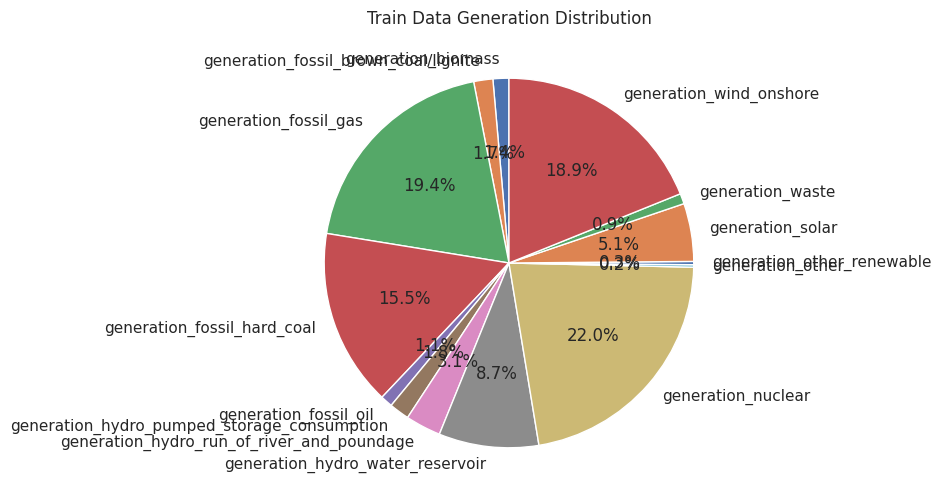

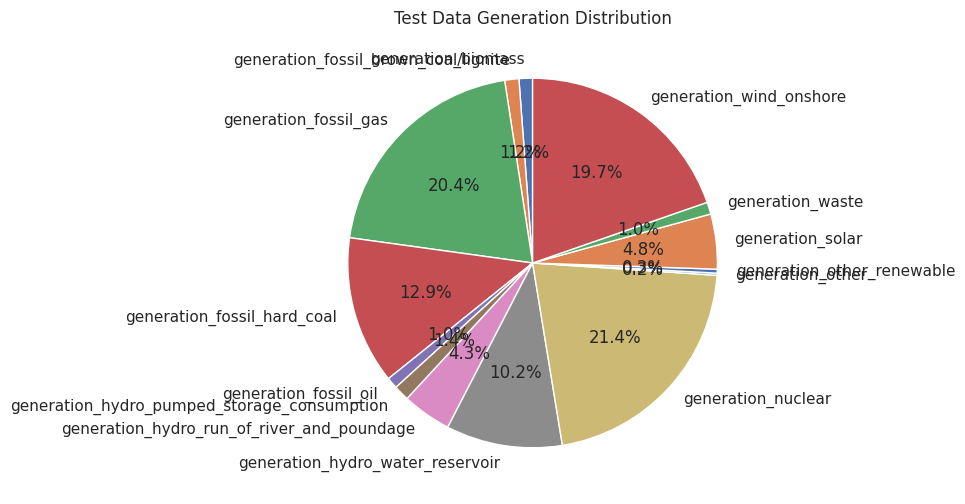

In [35]:
# train_dfの発電の合計を円グラフで表示
plt.figure(figsize=(10, 6))
train_df[generation_columns].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Train Data Generation Distribution')
plt.ylabel('')
plt.show()
# test_dfの発電の合計を円グラフで表示
plt.figure(figsize=(10, 6))
test_df[generation_columns].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Test Data Generation Distribution')
plt.ylabel('')
plt.show()

### 電力価格のグラフ化

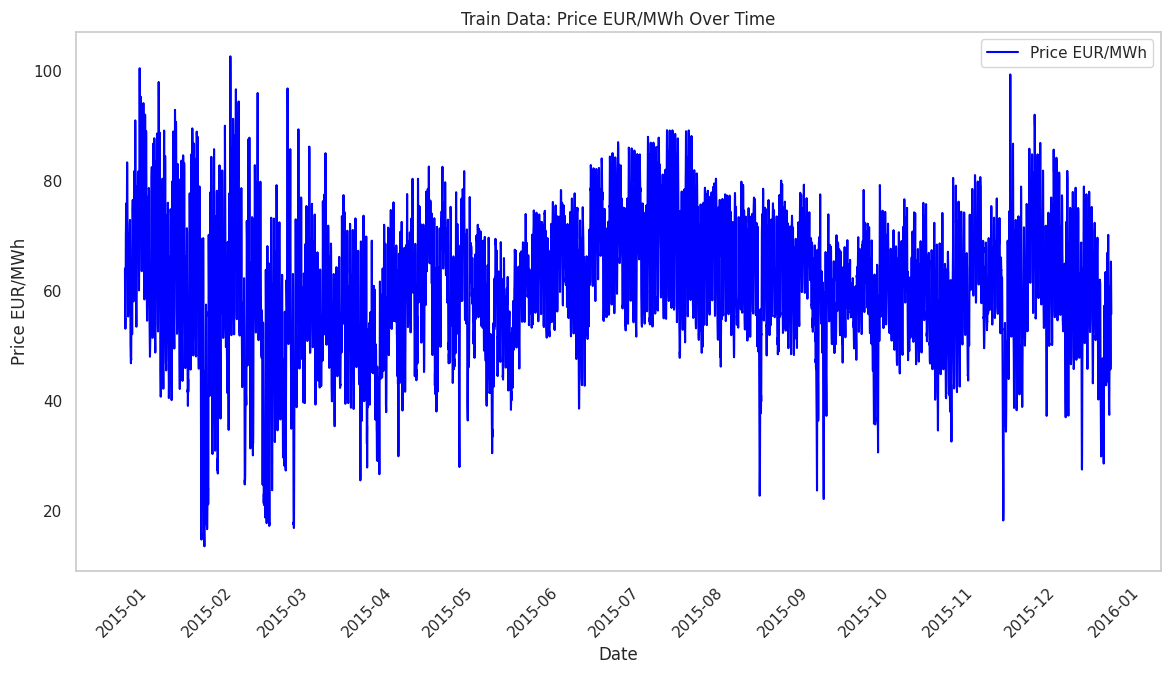

In [36]:
# trainデータの電力価格を年ごとに時系列で表示
cut_off_start = '2015-01-01'
cut_off_end = '2015-12-31'
train_df_2015 = train_df[(train_df.index >= cut_off_start) & (train_df.index <= cut_off_end)].copy()
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(train_df_2015.index), train_df_2015['price_actual'], label='Price EUR/MWh', color='blue')
plt.title('Train Data: Price EUR/MWh Over Time')
plt.xlabel('Date')
plt.ylabel('Price EUR/MWh')
plt.legend()

# x軸の目盛りの間引き
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

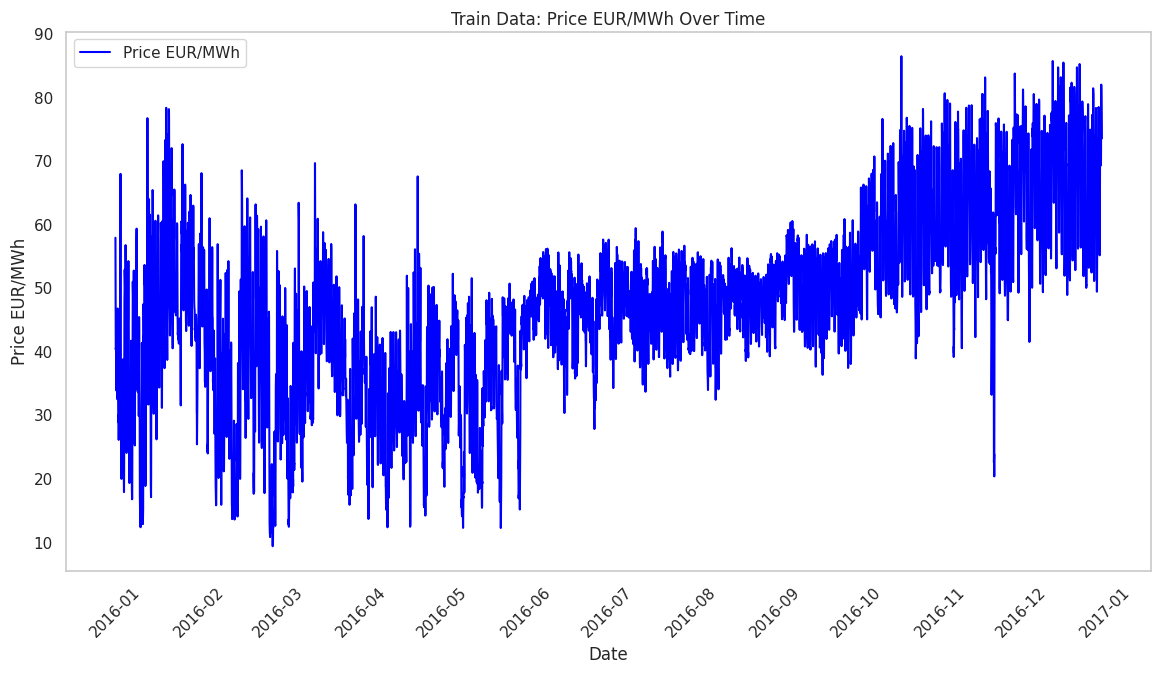

In [37]:
# trainデータの電力価格を年ごとに時系列で表示
cut_off_start = '2016-01-01'
cut_off_end = '2016-12-31'
train_df_2015 = train_df[(train_df.index >= cut_off_start) & (train_df.index <= cut_off_end)].copy()
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(train_df_2015.index), train_df_2015['price_actual'], label='Price EUR/MWh', color='blue')
plt.title('Train Data: Price EUR/MWh Over Time')
plt.xlabel('Date')
plt.ylabel('Price EUR/MWh')
plt.legend()

# x軸の目盛りの間引き
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

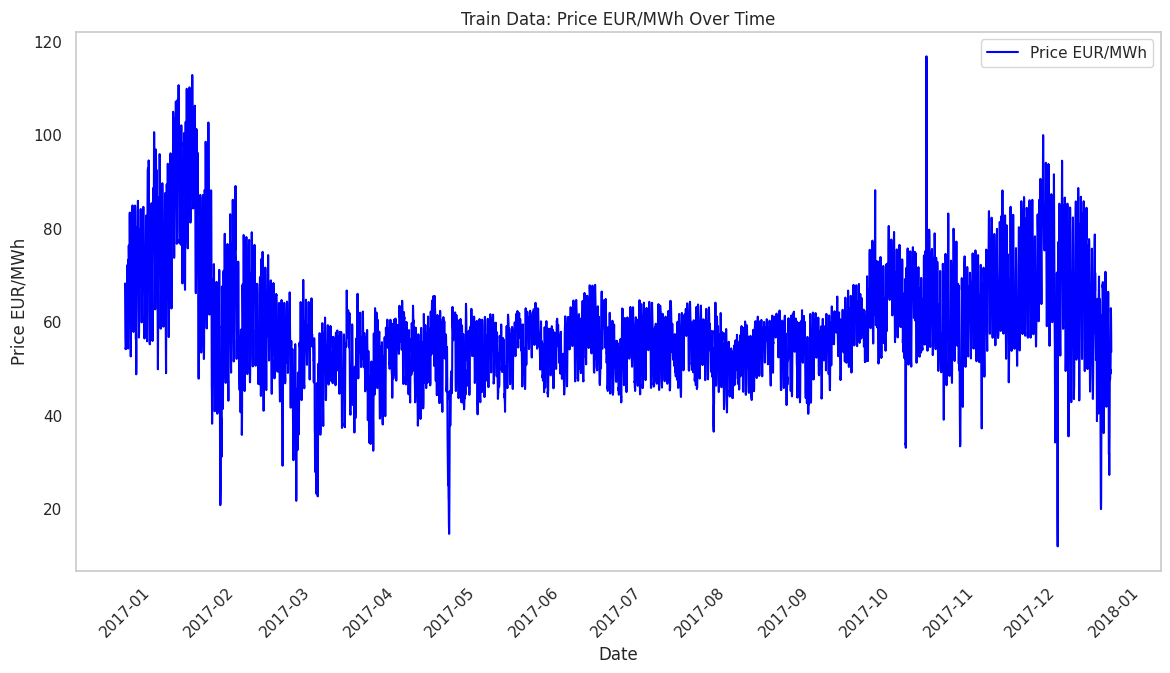

In [38]:
# trainデータの電力価格を年ごとに時系列で表示
cut_off_start = '2017-01-01'
cut_off_end = '2017-12-31'
train_df_2015 = train_df[(train_df.index >= cut_off_start) & (train_df.index <= cut_off_end)].copy()
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(train_df_2015.index), train_df_2015['price_actual'], label='Price EUR/MWh', color='blue')
plt.title('Train Data: Price EUR/MWh Over Time')
plt.xlabel('Date')
plt.ylabel('Price EUR/MWh')
plt.legend()

# x軸の目盛りの間引き
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

年によって電力価格の変化がだいぶ違うように見える。スパイク状の変化が見られる

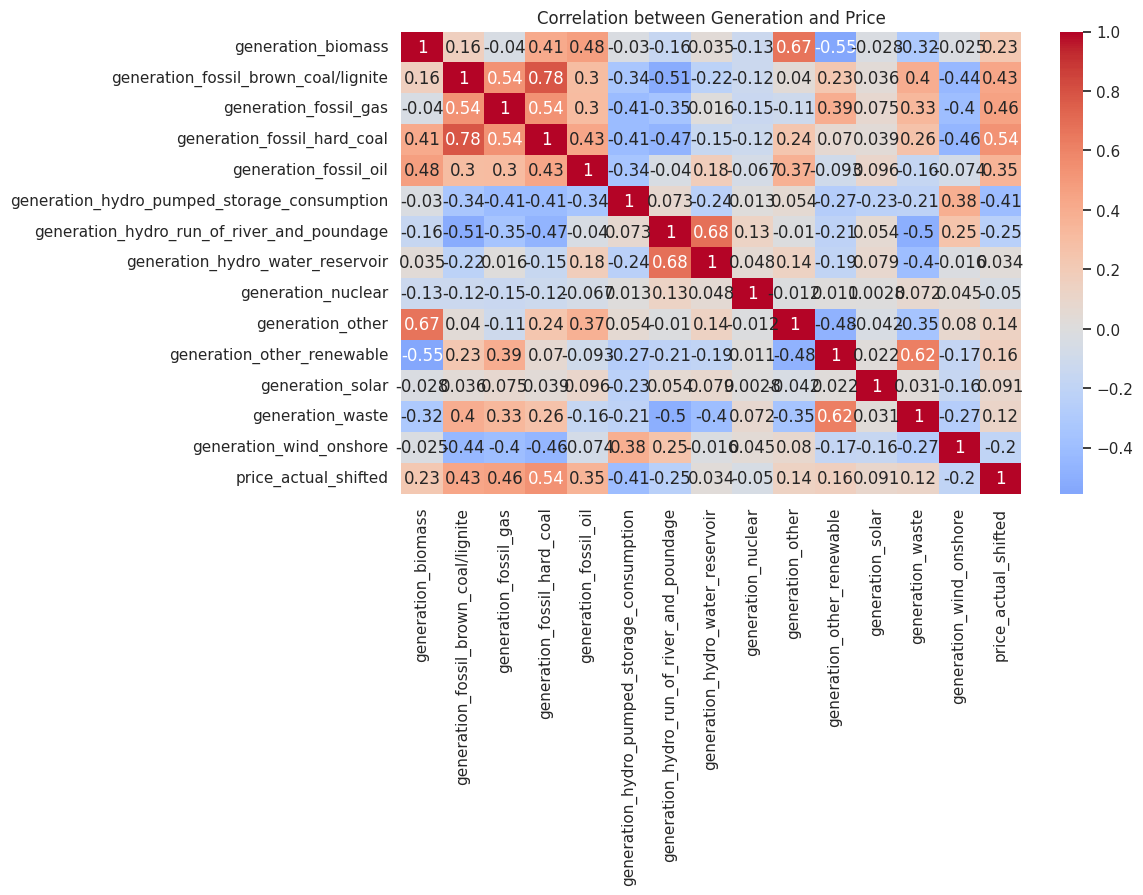

In [39]:
#現在の発電電力が電力価格と相関があると仮定して、電力価格との相関をみてみる
#まずは電力価格を24時間シフトして、発電のされている時間と価格の時間を合わせる
train_df['price_actual_shifted'] = train_df['price_actual'].shift(24).copy()
corr_df = train_df[generation_columns + ['price_actual_shifted']].copy().dropna()

# 電力価格と発電量の相関を計算
correlation_matrix = corr_df.corr()


# 全ての相関をヒートマップ形式で表示
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Generation and Price')
plt.show()


# # generation_columnsの各発電量と電力価格の散布図を作成
# # 回帰直線も表示
# generation_columns = [col for col in train_df.columns if 'generation' in col]
# for col in generation_columns:
#     plt.figure(figsize=(10, 6))
#     sns.regplot(data=train_df, x='price_actual_shifted', y=col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
#     plt.title(f'{col.replace("generation_", "").title()} Generation vs Price EUR/MWh')
#     plt.xlabel('Price EUR/MWh')
#     plt.ylabel(f'{col.replace("generation_", "").title()} Generation (MWh)')
#     plt.grid()
#     plt.show()

単純な相関からわかること
石炭発電されている時は褐炭による発電もされていることが多い。
流込式水力発電とダム発電も同時にされていることが多い。
その他再エネ発電とバイオマス発電は一緒に実施されない傾向
その他再エネ発電と廃棄物発電は一緒に実施される傾向
廃棄物発電と水力発電系は一緒に実施されない方向
価格に対して正の相関が強いのは石炭・褐炭発電、天然ガス発電。負の相関が強いのは揚水式水力発電消費量と流込式水力発電量

### シフト時間違い（０時間、１２時間、２４時間）で電力価格との相関をみる

<Figure size 6000x400 with 0 Axes>

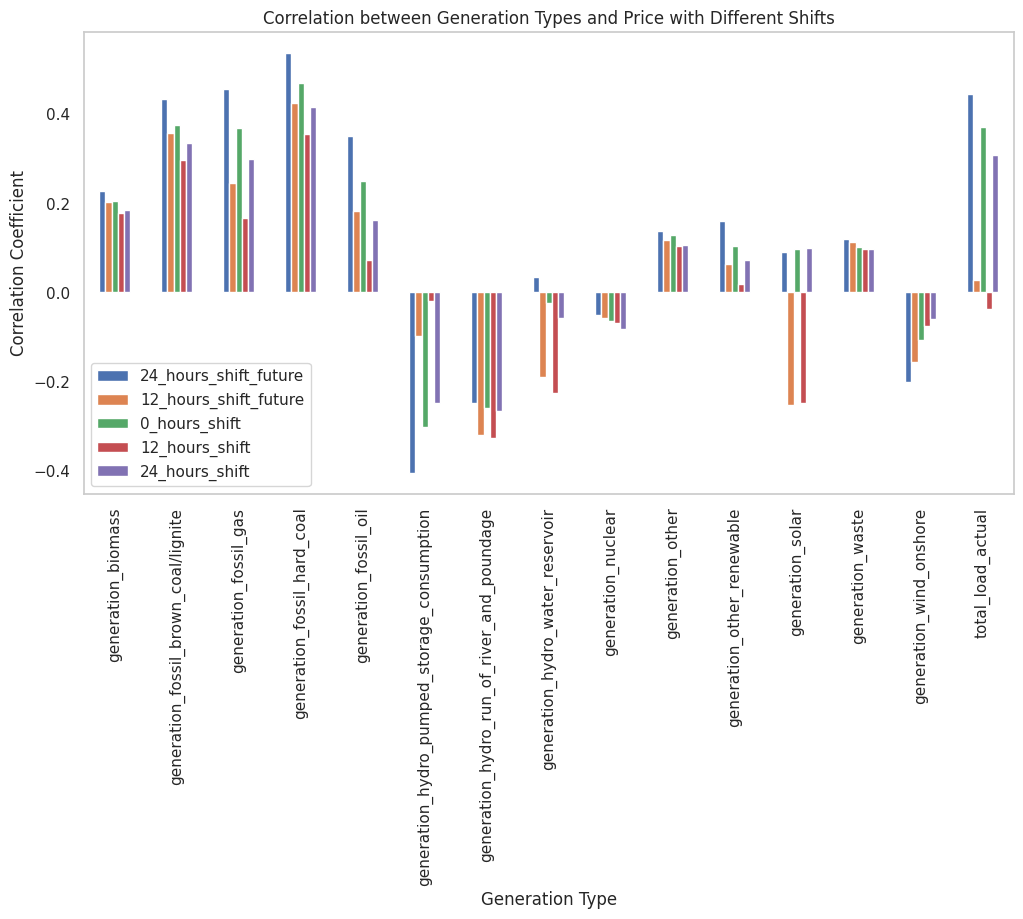

In [40]:
#発電電力と総合負荷が電力価格と相関があると仮定して、時間シフトして相関をみてみる

train_df['price_actual_shifted'] = train_df['price_actual'].shift(24).copy()
corr_df_m24 = train_df[generation_columns + ['total_load_actual','price_actual_shifted']].copy().dropna()

train_df['price_actual_shifted'] = train_df['price_actual'].shift(12).copy()
corr_df_m12 = train_df[generation_columns + ['total_load_actual','price_actual_shifted']].copy().dropna()

train_df['price_actual_shifted'] = train_df['price_actual'].shift(0).copy()
corr_df_0 = train_df[generation_columns + ['total_load_actual','price_actual_shifted']].copy().dropna()

train_df['price_actual_shifted'] = train_df['price_actual'].shift(-12).copy()
corr_df_p12 = train_df[generation_columns + ['total_load_actual','price_actual_shifted']].copy().dropna()

train_df['price_actual_shifted'] = train_df['price_actual'].shift(-24).copy()
corr_df_p24 = train_df[generation_columns + ['total_load_actual','price_actual_shifted']].copy().dropna()


# 電力価格と発電量の相関を計算
correlation_m24 = corr_df_m24.corr().iloc[:-1, -1]
correlation_m12 = corr_df_m12.corr().iloc[:-1, -1]
correlation_0 = corr_df_0.corr().iloc[:-1, -1]
correlation_p12 = corr_df_p12.corr().iloc[:-1, -1]
correlation_p24 = corr_df_p24.corr().iloc[:-1, -1]


# 相関をデータフレームにまとめる
correlation_df = pd.DataFrame({
    '24_hours_shift_future': correlation_m24,
    '12_hours_shift_future': correlation_m12,
    '0_hours_shift': correlation_0,
    '12_hours_shift': correlation_p12,
    '24_hours_shift': correlation_p24


}).reset_index().rename(columns={'index': 'generation_type'})
# 相関を棒グラフで表示
plt.figure(figsize=(60, 4))
correlation_df.set_index('generation_type').plot(kind='bar', rot=90)
plt.title('Correlation between Generation Types and Price with Different Shifts')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Generation Type')
plt.grid()

### 気温に関して相関を見ておく

In [41]:
# temperatureという文字を含む列の値を確認
temperature_columns = [col for col in train_df.columns if 'temp' in col]
print("Columns containing 'temperature':", temperature_columns)

Columns containing 'temperature': ['valencia_temp', 'valencia_temp_min', 'valencia_temp_max', 'madrid_temp', 'madrid_temp_min', 'madrid_temp_max', 'bilbao_temp', 'bilbao_temp_min', 'bilbao_temp_max', 'barcelona_temp', 'barcelona_temp_min', 'barcelona_temp_max', 'seville_temp', 'seville_temp_min', 'seville_temp_max']


In [42]:
# temperatureデータのKからdegCへの変換
test_df[temperature_columns] = test_df[temperature_columns] - 273.15
train_df[temperature_columns] = train_df[temperature_columns] - 273.15

<Axes: title={'center': 'Test Data Temperature Over Time'}, xlabel='time'>

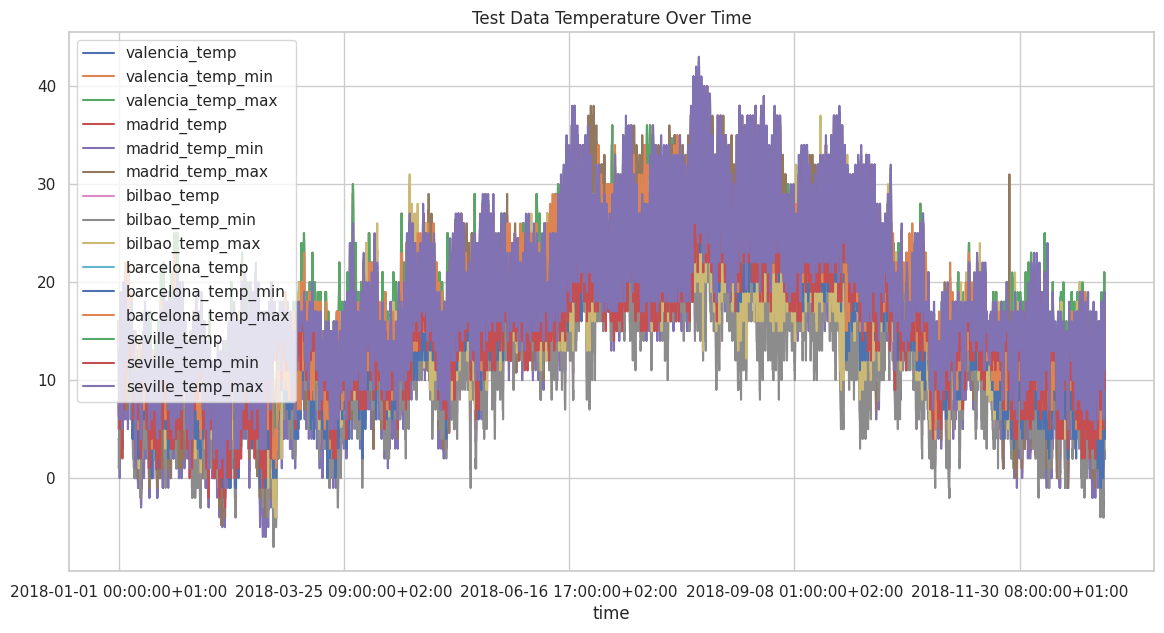

In [43]:
test_df[temperature_columns].plot(figsize=(14, 7), title='Test Data Temperature Over Time')

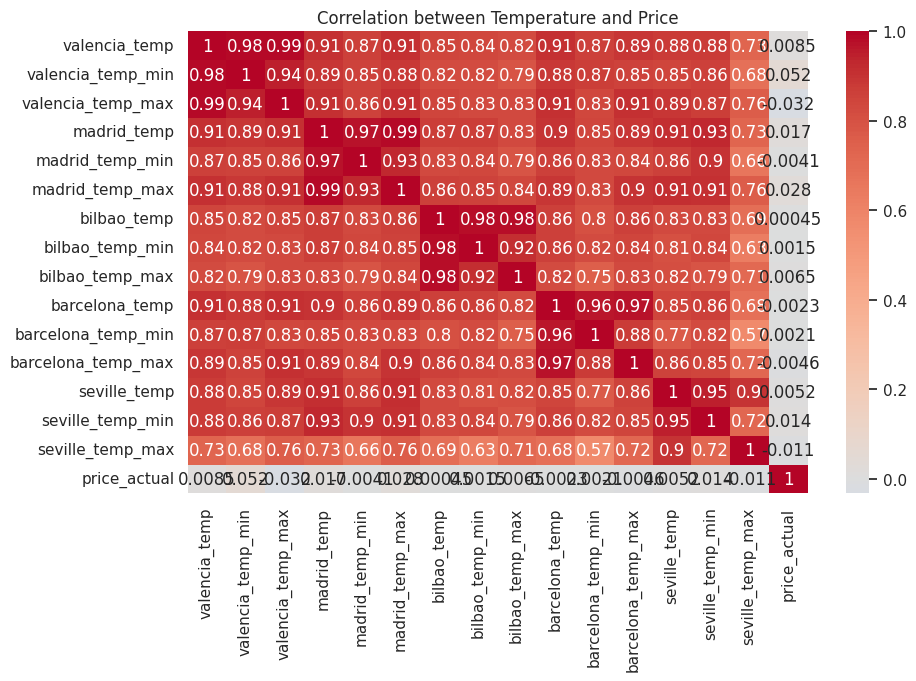

In [44]:
# 温度と電力価格の相関を計算
corr_df = train_df[temperature_columns + ['price_actual']].copy().dropna()
corr_matrix = corr_df.corr()
# 温度と電力価格の相関をヒートマップで表示
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Temperature and Price')
plt.show()


どこかだけ温度がかけ離れているということはなさそう。 チュートリアルのように20℃との差分の絶対値を取ることで再度コリレーションを取ってみる。

In [45]:
# まずはtemperature_columnsに_diffabsを追加したcolummnsを作成
temperature_columns_diff_abs = [f'{col}_diff_abs' for col in temperature_columns]

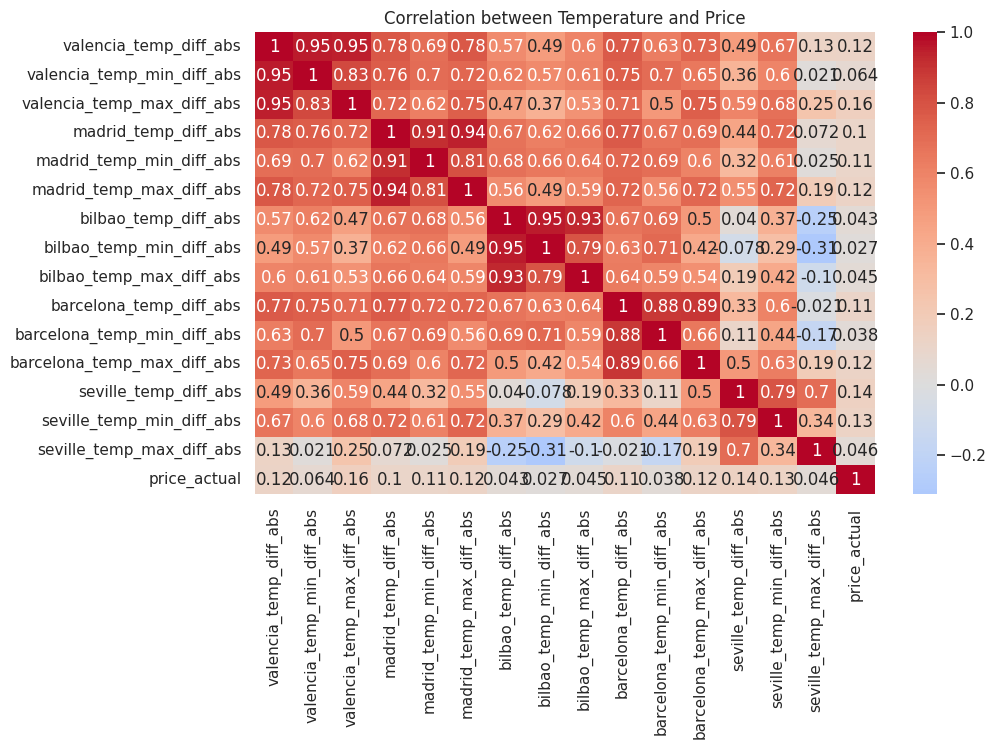

In [46]:
# comfort = 20 degCと仮定して、温度と電力価格の相関を計算
comfort_temp = 20

for col in temperature_columns:
    train_df[f'{col}_diff_abs'] = (train_df[col] - comfort_temp).abs()

#temmperature_columns_diff_absを使って、電力価格との相関を計算
corr_df = train_df[temperature_columns_diff_abs + ['price_actual']].copy().dropna()
corr_matrix = corr_df.corr()
# ヒートマップで表示
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Temperature and Price')
plt.show()


<Axes: title={'center': 'Train Data Temperature Difference from Comfort Over Time'}, xlabel='time'>

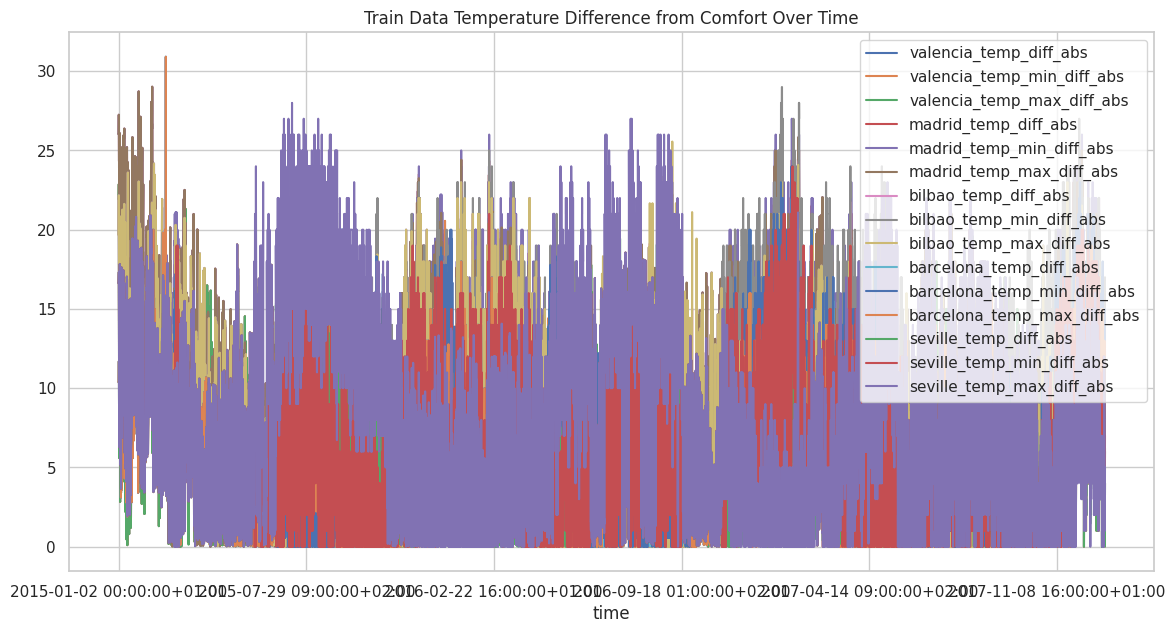

In [47]:
train_df[temperature_columns_diff_abs].plot(figsize=(14, 7), title='Train Data Temperature Difference from Comfort Over Time')

valenciaのtemp_maxの方が相関が高いのはやはり夏はクーラーで冷やすしかなく、電気の需要が増えるということだろうか。 一方で５つの地点のうちbilbaoは相関が出ない。

In [48]:
# humidityという文字を含む列の値を確認
humidity_columns = [col for col in train_df.columns if 'humidity' in col]
print("Columns containing 'humidity':", humidity_columns)

Columns containing 'humidity': ['valencia_humidity', 'madrid_humidity', 'bilbao_humidity', 'barcelona_humidity', 'seville_humidity']


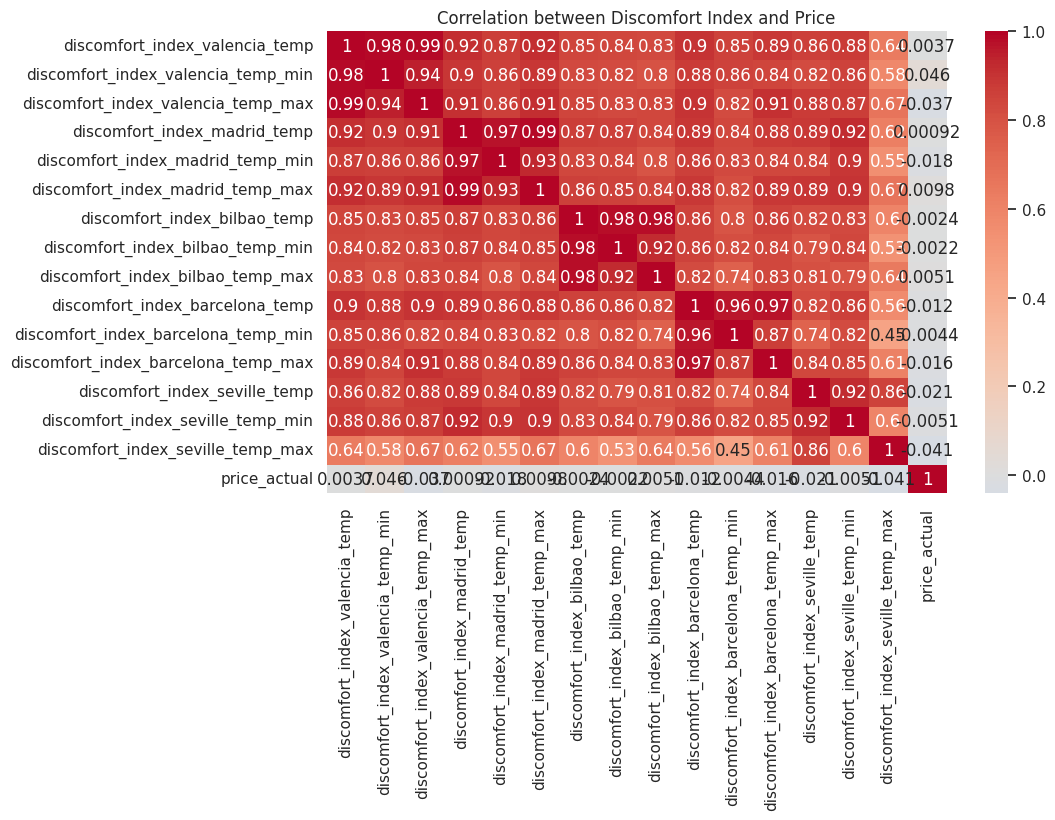

In [49]:
# 不快指数を求める関数
def discomfort_index(temp, humidity):
    return temp * 0.81 + (humidity / 100) * (temp - 14.3) + 46.3

# 不快指数を計算して新しい列を追加
temperature_columns = ['valencia_temp', 'valencia_temp_min', 'valencia_temp_max', 'madrid_temp', 'madrid_temp_min', 'madrid_temp_max', 'bilbao_temp', 'bilbao_temp_min', 'bilbao_temp_max', 'barcelona_temp', 'barcelona_temp_min', 'barcelona_temp_max', 'seville_temp', 'seville_temp_min', 'seville_temp_max']
train_df['discomfort_index_valencia_temp'] = discomfort_index(train_df['valencia_temp'], train_df['valencia_humidity'])
train_df['discomfort_index_valencia_temp_min'] = discomfort_index(train_df['valencia_temp_min'], train_df['valencia_humidity'])
train_df['discomfort_index_valencia_temp_max'] = discomfort_index(train_df['valencia_temp_max'], train_df['valencia_humidity'])
train_df['discomfort_index_madrid_temp'] = discomfort_index(train_df['madrid_temp'], train_df['madrid_humidity'])
train_df['discomfort_index_madrid_temp_min'] = discomfort_index(train_df['madrid_temp_min'], train_df['madrid_humidity'])
train_df['discomfort_index_madrid_temp_max'] = discomfort_index(train_df['madrid_temp_max'], train_df['madrid_humidity'])
train_df['discomfort_index_bilbao_temp'] = discomfort_index(train_df['bilbao_temp'], train_df['bilbao_humidity'])
train_df['discomfort_index_bilbao_temp_min'] = discomfort_index(train_df['bilbao_temp_min'], train_df['bilbao_humidity'])
train_df['discomfort_index_bilbao_temp_max'] = discomfort_index(train_df['bilbao_temp_max'], train_df['bilbao_humidity'])
train_df['discomfort_index_barcelona_temp'] = discomfort_index(train_df['barcelona_temp'], train_df['barcelona_humidity'])
train_df['discomfort_index_barcelona_temp_min'] = discomfort_index(train_df['barcelona_temp_min'], train_df['barcelona_humidity'])
train_df['discomfort_index_barcelona_temp_max'] = discomfort_index(train_df['barcelona_temp_max'], train_df['barcelona_humidity'])
train_df['discomfort_index_seville_temp'] = discomfort_index(train_df['seville_temp'], train_df['seville_humidity'])
train_df['discomfort_index_seville_temp_min'] = discomfort_index(train_df['seville_temp_min'], train_df['seville_humidity'])
train_df['discomfort_index_seville_temp_max'] = discomfort_index(train_df['seville_temp_max'], train_df['seville_humidity'])
# 不快指数の列を確認
discomfort_index_columns = [col for col in train_df.columns if 'discomfort_index' in col]

# 不快指数と電力価格の相関を計算
corr_df = train_df[discomfort_index_columns + ['price_actual']].copy().dropna()
corr_matrix = corr_df.corr()
# 不快指数と電力価格の相関をヒートマップで表示
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Discomfort Index and Price')
plt.show()

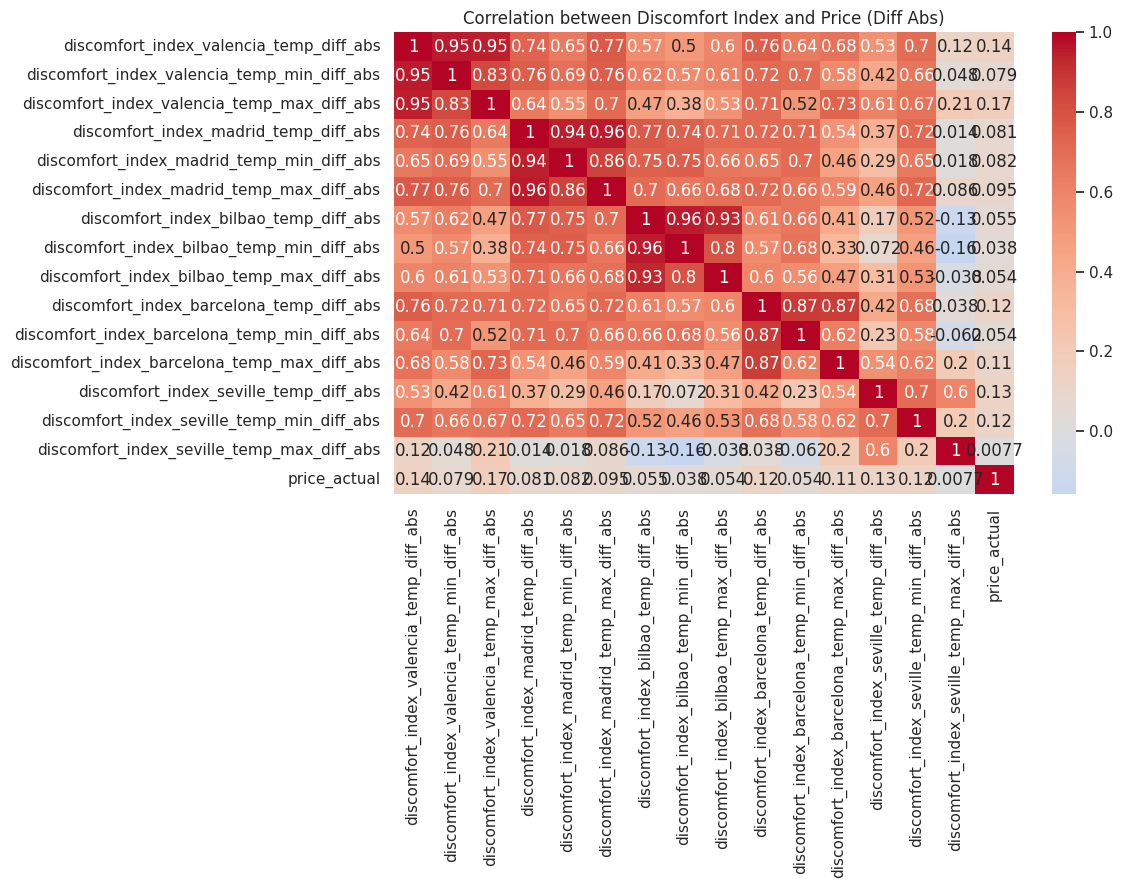

In [50]:
# 不快指数のcomfortを65と仮定して、電力価格との相関を計算
comfort_index = 65
# 不快指数の差分を計算
for col in discomfort_index_columns:
    train_df[f'{col}_diff_abs'] = (train_df[col] - comfort_index).abs()

# 不快指数の差分と電力価格の相関を計算
corr_df = train_df[[f'{col}_diff_abs' for col in discomfort_index_columns] + ['price_actual']].copy().dropna()
corr_matrix = corr_df.corr()
# ヒートマップで表示
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Discomfort Index and Price (Diff Abs)')
plt.show()


### 線形回帰（Lasso回帰）でも重要度を確認

In [51]:
# まずは先ほどのデータから各発電量をリークしないようにシフトする

train_df['generation_biomass_shifted'] = train_df['generation_biomass'].shift(0).copy()
train_df['generation_fossil_brown_coal/lignite_shifted'] = train_df['generation_fossil_brown_coal/lignite'].shift(0).copy()
train_df['generation_fossil_gas_shifted'] = train_df['generation_fossil_gas'].shift(0).copy()
train_df['generation_fossil_hard_coal_shifted'] = train_df['generation_fossil_hard_coal'].shift(0).copy()
train_df['generation_fossil_oil_shifted'] = train_df['generation_fossil_oil'].shift(0).copy()
train_df['generation_hydro_pumped_storage_consumption_shifted'] = train_df['generation_hydro_pumped_storage_consumption'].shift(0).copy()
train_df['generation_hydro_run_of_river_and_poundage_shifted'] = train_df['generation_hydro_run_of_river_and_poundage'].shift(12).copy()
train_df['generation_hydro_water_reservoir_shifted'] = train_df['generation_hydro_water_reservoir'].shift(12).copy()
train_df['generation_nuclear_shifted'] = train_df['generation_nuclear'].shift(24).copy()
train_df['generation_other_shifted'] = train_df['generation_other'].shift(0).copy()
train_df['generation_other_renewable_shifted'] = train_df['generation_other_renewable'].shift(0).copy()
train_df['generation_solar_shifted'] = train_df['generation_solar'].shift(12).copy()
train_df['generation_waste_shifted'] = train_df['generation_waste'].shift(0).copy()
train_df['generation_wind_onshore_shifted'] = train_df['generation_wind_onshore'].shift(0).copy()
train_df['total_load_actual_shifted'] = train_df['total_load_actual'].shift(0).copy()

In [52]:
selected_features = [
    'generation_biomass_shifted',
    'generation_fossil_brown_coal/lignite_shifted',
    'generation_fossil_gas_shifted',
    'generation_fossil_hard_coal_shifted',
    'generation_fossil_oil_shifted',
    'generation_hydro_pumped_storage_consumption_shifted',
    'generation_hydro_run_of_river_and_poundage_shifted',
    'generation_hydro_water_reservoir_shifted',
    'generation_nuclear_shifted',
    'generation_other_shifted',
    'generation_other_renewable_shifted',
    'generation_solar_shifted',
    'generation_waste_shifted',
    'generation_wind_onshore_shifted',
    'total_load_actual_shifted',
    'valencia_temp_max_diff_abs',
    'madrid_temp_max_diff_abs',
    'barcelona_temp_max_diff_abs',
    'seville_temp_diff_abs',
    'discomfort_index_valencia_temp_max_diff_abs',
    'discomfort_index_barcelona_temp_diff_abs',
    'discomfort_index_seville_temp_diff_abs']

Top 15 important features:
                                              feature  importance
3                 generation_fossil_hard_coal_shifted    4.453780
0                          generation_biomass_shifted    1.816117
11                           generation_solar_shifted    1.287487
14                          total_load_actual_shifted    1.004447
6   generation_hydro_run_of_river_and_poundage_shi...    0.947529
12                           generation_waste_shifted    0.764781
9                            generation_other_shifted    0.409943
10                 generation_other_renewable_shifted    0.305432
19        discomfort_index_valencia_temp_max_diff_abs    0.305239
2                       generation_fossil_gas_shifted    0.286873
5   generation_hydro_pumped_storage_consumption_sh...    0.063920
1        generation_fossil_brown_coal/lignite_shifted    0.000000
4                       generation_fossil_oil_shifted    0.000000
7            generation_hydro_water_reservoir_shi

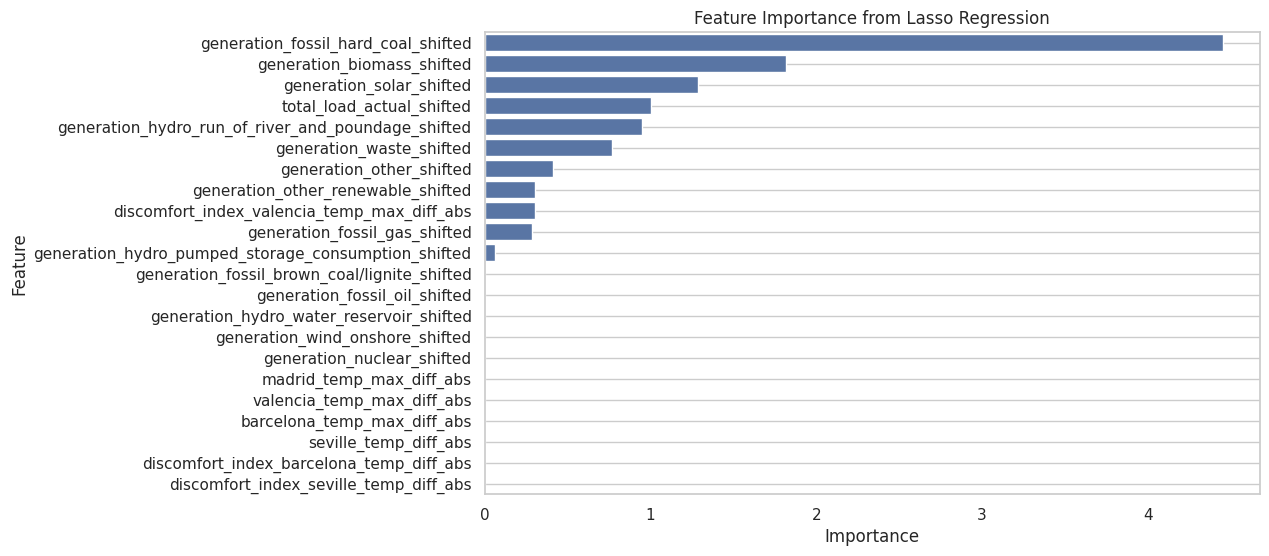

In [53]:
# このデータを使ってLasso回帰を行う。目標変数はprice_actualとし、重要度を確認する。
# 特徴量と目標変数の設定
X = train_df[selected_features].dropna()

# データの標準化として現在から365日前までのデータで標準化を行う
# 過去365日間の平均と標準偏差
def calc_rolling_stats(df, col_name):
    rolling_mean = df[col_name].rolling(window=365*24, min_periods=100*24).mean()
    rolling_std = df[col_name].rolling(window=365*24, min_periods=100*24).std()
    df[col_name] = (df[col_name] - rolling_mean) / rolling_std
    return df[col_name]

X_scaled = X.copy()
# 過去365日間の平均と標準偏差を計算して標準化
for selected_feature in selected_features:
    X_scaled[selected_feature] = calc_rolling_stats(X, selected_feature)

X_scaled = X_scaled.dropna()

y = train_df['price_actual'].loc[X_scaled.index]



# Lasso回帰モデルの作成
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_scaled, y)

# 重要度の取得
importance = np.abs(lasso_model.coef_)
# 重要度をデータフレームにまとめる
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)
# 重要度を棒グラフで表示
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
# 重要度の高い特徴量を表示
print("Top 15 important features:")
print(importance_df.head(15))

### ElasticNetで予測

In [54]:
#lasso回帰モデルで重要度が０ではなかった特徴量を選択
selected_features_lasso = importance_df[importance_df['importance'] > 0.0000001]['feature'].tolist()
# 選択された特徴量を表示
print("Selected features from Lasso regression:")
print(selected_features_lasso)

Selected features from Lasso regression:
['generation_fossil_hard_coal_shifted', 'generation_biomass_shifted', 'generation_solar_shifted', 'total_load_actual_shifted', 'generation_hydro_run_of_river_and_poundage_shifted', 'generation_waste_shifted', 'generation_other_shifted', 'generation_other_renewable_shifted', 'discomfort_index_valencia_temp_max_diff_abs', 'generation_fossil_gas_shifted', 'generation_hydro_pumped_storage_consumption_shifted']


<Axes: xlabel='time'>

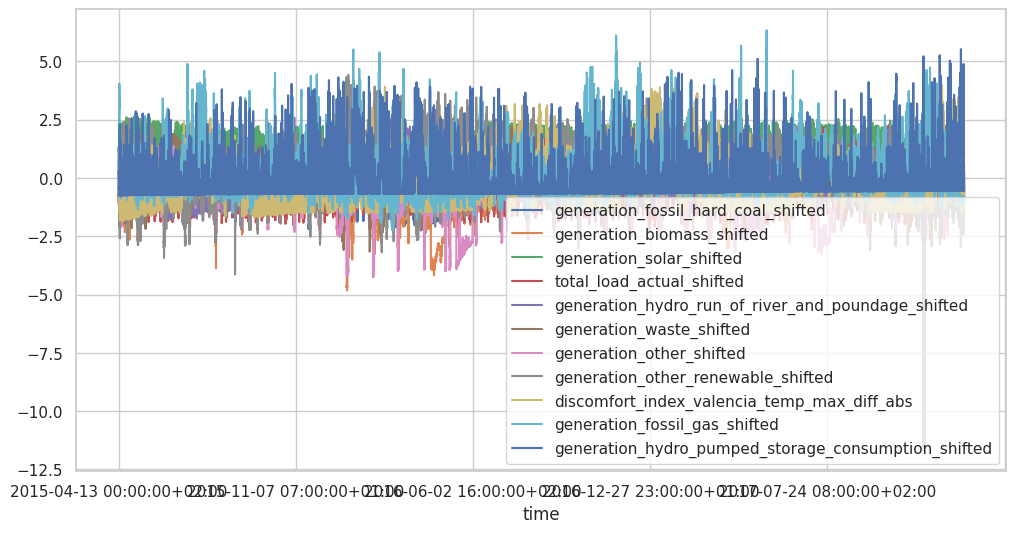

In [55]:
X_scaled[selected_features_lasso].plot(kind='line', figsize=(12, 6))

Validation RMSE: 11.92


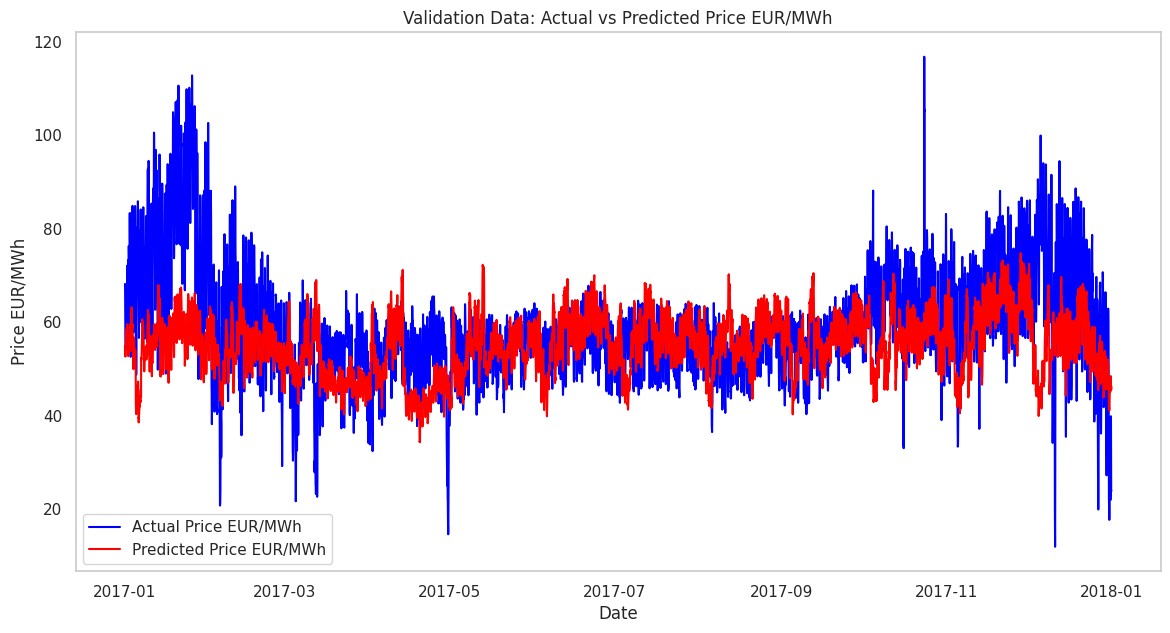

In [56]:
# Xとyは先ほどと同様に設定するものの、2017年以降のデータをvalidation用に分ける
cut_off_date = '2017-01-01'
X_train_scaled = X_scaled.loc[X_scaled.index < cut_off_date]
y_train = y.loc[y.index < cut_off_date]
X_val_scaled = X_scaled.loc[X_scaled.index >= cut_off_date]
y_val = y.loc[y.index >= cut_off_date]

# selected_features_lassoを使ってX_train_scaledとX_val_scaledを再定義
X_train_scaled = X_train_scaled[selected_features_lasso]
X_val_scaled = X_val_scaled[selected_features_lasso]


# ElasticNet回帰モデルの作成
from sklearn.linear_model import ElasticNet
ElasticNet_model = ElasticNet()
ElasticNet_model.fit(X_train_scaled, y_train)
# バリデーションデータでの予測
y_val_pred = ElasticNet_model.predict(X_val_scaled)
# バリデーションデータでのRMSEとR^2を計算
rmse_val = root_mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
# 結果を表示
print(f'Validation RMSE: {rmse_val:.2f}')

# 予測結果をプロット
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(y_val.index), y_val, label='Actual Price EUR/MWh', color='blue')
plt.plot(pd.to_datetime(y_val.index), y_val_pred, label='Predicted Price EUR/MWh', color='red')
plt.title('Validation Data: Actual vs Predicted Price EUR/MWh')
plt.xlabel('Date')
plt.ylabel('Price EUR/MWh')
plt.legend()
plt.grid()

# 確認結果

## 天気コードについて

weather_descriptionをtrainデータとtestデータで比較した場合

### Trainデータにのみ存在するもの

['very heavy rain', 'light shower snow', 'ragged shower rain', 'heavy snow', 'sand dust whirls', 'proximity drizzle', 'dust', 'light thunderstorm']

### Testデータにのみ存在するもの

['squalls']

## 発電量について

### 発電量のトップ４

generation_nuclear                             53303640.0

generation_fossil_gas                          50897774.0

generation_wind_onshore                        49111457.0

generation_fossil_hard_coal                    32315652.0

### 価格との相関はものにより時間シフトの効果が違う

（あくまでdf.corrの結果ですが）

48時間前の相関が24時間前よりも現在値よりも良いもの

(Defaultの同じ行のデータが24時間前なのでシフトして検証しています）

・generation_nuclear

12時間シフトした方が相関が良いもの

・generation_solar

・generation_hydro_water_reservoir

・generation_hydro_run_of_river_and_poundage

現在データの相関が一番良いもの

・上記以外

## 不快指数について

温度と湿度から不快指数を計算して相関を取ってみたが、

快適である65との差分の絶対値をとらないと相関が上がらず、

温度の20度との差分の絶対値と有意な差があるようには見えなかった。